# SDFusion: Text-guided Generation (txt2shape)

### TODO: add sample results or teaser images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
cd Soft-Fusion-FYP

/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP


In [ ]:
!pip install fvcore iopath

# Install specific versions of PyTorch and related packages
#!pip install torch==1.13.0+cu117 torchvision==0.14.0+cu117 torchaudio==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1+cu116 -f https://download.pytorch.org/whl/torch_stable.html

# Install additional Python packages
!pip install h5py joblib termcolor scipy einops tqdm matplotlib opencv-python PyMCubes imageio trimesh omegaconf tensorboard notebook transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=64148f37505234161579d79ac51cf11d0fa8d0cdafbd5ff70738ee17c06eec49
  Stored in directory: /root/.cache/pip/wheels/65/71/95/3b8fde5c65c6e4a806e0867c1651dcc71a1cb2f3430e8f355f
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=c545250ac2efb42779d910d7fed5eebe3fba00e0d97c5d32fed47890b0efe9f5
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built fvcore iopath
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.2 MB/s eta 0:00:00
ERROR: Ignored the following yanked versions: 0.1.

In [ ]:
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py311_cu124_pyt260/download.html
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    st

In [ ]:
!pip install -U 'git+https://github.com/facebookresearch/iopath'

!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu124

!curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
!tar xzf 1.10.0.tar.gz
!export CUB_HOME=$PWD/cub-1.10.0

# !pip install "git+https://github.com/facebookresearch/pytorch3d.git@stable" -v

  Cloning https://github.com/facebookresearch/iopath to /tmp/pip-req-build-h50xsjoy
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/iopath /tmp/pip-req-build-h50xsjoy
  Resolved https://github.com/facebookresearch/iopath to commit 36cc3f258303080087de9eb670a3c08a41d79a5c
  Preparing metadata (setup.py) ... done
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 134.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 114.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.4/883.4 kB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 132.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
!pip install --extra-index-url https://miropsota.github.io/torch_packages_builder \
pytorch3d==0.7.8+pt2.4.0cu124


Looking in indexes: https://pypi.org/simple, https://miropsota.github.io/torch_packages_builder
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 MB 18.4 MB/s eta 0:00:00


In [ ]:
import torch
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.4.0+cu124


In [ ]:
import sys
import torch

# Verify Python version
print("Python Version:", sys.version)

# Verify PyTorch version
print("Torch Version:", torch.__version__)


Python Version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Torch Version: 2.4.0+cu124


In [ ]:
# Update the package list and install libglu1-mesa-dev
!sudo apt-get update
!sudo apt-get install libglu1-mesa-dev

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,720 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,926 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packa

In [ ]:
# first set up which gpu to use
import os
gpu_ids = 0
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_ids}"

In [ ]:
import torch
print(torch.cuda.is_available())  # This should return True
print(torch.cuda.current_device())  # This should return the GPU index
print(torch.cuda.get_device_name(torch.cuda.current_device()))  # This should return 'A100'


True
0
NVIDIA L4


In [ ]:
!nvidia-smi


Fri Feb 14 03:53:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             46W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# import libraries
import numpy as np
from IPython.display import Image as ipy_image
from IPython.display import display
from termcolor import colored, cprint

import torch
print(torch.cuda.is_available())
import torch.backends.cudnn as cudnn
cudnn.benchmark = True
import torchvision.utils as vutils

from models.base_model import create_model
from utils.util_3d import render_sdf, render_mesh, sdf_to_mesh, save_mesh_as_gif

%load_ext autoreload
%autoreload 2

True


In [ ]:
# options for the model. please check `utils/demo_util.py` for more details
from utils.demo_util import SDFusionText2ShapeOpt

seed = 2023
opt = SDFusionText2ShapeOpt(gpu_ids=gpu_ids, seed=seed)
# device = opt.device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
opt.device = device  # Ensure the device is correctly set in options
print(f"Using device for options: {opt.device}")

[*] SDFusionText2ShapeOption initialized.
Using device for options: cuda


In [ ]:
# enable proxy for huggingface

import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [ ]:
!apt-get install intel-mkl


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
intel-mkl is already the newest version (2020.4.304-2ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# Modify LD_LIBRARY_PATH in Colab with quoted paths
!export LD_LIBRARY_PATH="$LD_LIBRARY_PATH:/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface:/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/tbb/tbb2018_20180822oss/lib/intel64/gcc4.7:/usr/lib64-nvidia"


In [ ]:
import os

# Modify LD_LIBRARY_PATH in Python
os.environ['LD_LIBRARY_PATH'] = (
    os.environ.get('LD_LIBRARY_PATH', '') +
    ":/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface" +
    ":/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/tbb/tbb2018_20180822oss/lib/intel64/gcc4.7" +
    ":/usr/lib64-nvidia"
)

# Verify the path
print(os.environ['LD_LIBRARY_PATH'])


/usr/lib64-nvidia:/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface:/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/tbb/tbb2018_20180822oss/lib/intel64/gcc4.7:/usr/lib64-nvidia


In [ ]:
!chmod +rx /content/drive/MyDrive/Colab\ Notebooks/Soft-Fusion-FYP/preprocess/isosurface/LIB_PATH


In [ ]:
!chmod +x "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/computeDistanceField"


In [ ]:
import os

sdfcommand = "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/computeDistanceField"
if not os.path.exists(sdfcommand):
    print("SDF command does not exist at the specified path.")
else:
    print("SDF command exists.")


SDF command exists.


In [ ]:
import stat

# Check if the file is executable
if os.path.exists(sdfcommand):
    permissions = os.stat(sdfcommand).st_mode
    if permissions & stat.S_IXUSR:  # Check if user has execute permission
        print("SDF command is executable.")
    else:
        print("SDF command is not executable. Please set the executable permissions.")


SDF command is executable.


# **Preprocess**

In [ ]:
cd preprocess/launchers

/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/launchers


In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/fold based extension 1dof soft actuator 6 folds short Model 0/model.obj"))


True


In [ ]:
!bash launch_create_sdf_softnet.sh

finish all
sh: 1: source: not found
command: source /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/LIB_PATH
sh: 1: source: not found
[*] checking obj files in robot (01)
[*] all files exist for robot (01)!
Model ID: a45
norm sub mesh: /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/norm_mesh_dir_v1/a45
sdf sub dir: /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_64/a45
normalizing:  /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/a45/model.obj
trimesh_load: /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/a45/model.obj
File exists: True
[*] done! /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/a45/model.obj
start sample surface of  3742
end sample surface
creating /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_64/a45/isosurf.sdf
sdfcommand:  /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FY

In [ ]:
!"/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/computeDistanceField" "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/a25/pc_norm.obj" 512 512 512 -s -e 1.3 -o 1.dist -m 1 -c


Expansion ratio is: 1.3.
sigma = 0.00881473 = 2 grids
bandwidth = 0.0220368 = 5 grids
Data output format is: IEEE single (32-bit) precision.
UseCubeBox: 1
********* Computing signed distance field (512 x 512 x 512) *************
Forcing a cube-sized bounding box.
********* Computing unsigned distance field (512 x 512 x 512) *************
Building BV Tree...Done
Computing the distance field...
Corners of the bounding box are:
  [-1.02444 -1.07118 -1.12765]
  [1.23213 1.18539 1.12892]
Grid sizes are: 0.00440736 0.00440736 0.00440736
336 128 0 368 344 384 320 352 304 256 448 288 369 337 345 385 321 129 1 353 305 257 449 289 370 322 338 346 386 130 306 2 354 258 450 290 323 371 339 347 387 131 307 3 355 259 451 291 324 372 340 348 132 308 388 356 4 260 452 292 325 373 349 133 341 309 389 357 5 261 453 293 326 374 350 342 134 310 358 390 6 262 454 294 327 375 351 311 135 343 359 391 7 263 455 328 376 295 312 360 136 480 332 392 8 264 456 329 377 313 361 137 296 333 393 481 9 265 330 457 378

In [ ]:
!mv "1.dist" "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_128/a25/isosurf.sdf"


mv: cannot move '1.dist' to '/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_128/a25/isosurf.sdf': No such file or directory


In [ ]:
!ldd "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/computeDistanceField" "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/a26/pc_norm.obj" 256 256 256 -s -e 1.3 -o 2.dist -m 1 -c


/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/computeDistanceField:
	linux-vdso.so.1 (0x00007fffadb51000)
	libGL.so.1 => /usr/lib64-nvidia/libGL.so.1 (0x00007f7729800000)
	libGLU.so.1 => /lib/x86_64-linux-gnu/libGLU.so.1 (0x00007f7729af0000)
	libglut.so.3 => /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/libglut.so.3 (0x00007f7729aa3000)
	libtcmalloc.so.4 => /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/libtcmalloc.so.4 (0x00007f7729400000)
	libtbb.so.2 => /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/tbb/tbb2018_20180822oss/lib/intel64/gcc4.7/libtbb.so.2 (0x00007f7729000000)
	libtbb_preview.so.2 => /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/tbb/tbb2018_20180822oss/lib/intel64/gcc4.7/libtbb_preview.so.2 (0x00007f7728c00000)
	libstdc++.so.6 => /lib/x86_64-linux-gnu/libstdc++.so.6 (0x00007f77289d4000)
	libm.so.6 => /lib/x86_64-linux-

In [ ]:
cd ..

/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP


# **Training**

In [ ]:
!nvidia-smi

Mon Feb 17 08:04:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             70W /  400W |       5MiB /  40960MiB |     27%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# Set max_split_size_mb to avoid fragmentation
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"


In [ ]:
!bash /content/drive/MyDrive/Colab\ Notebooks/Soft-Fusion-FYP/launchers/train_vqvae_softnet.sh


Streaming output truncated to the last 5000 lines.
[*] End of steps 300 	 Time Taken: 147 sec 
/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/logs_home/2025-03-28T13-23-47-vqvae-snet-all-res64-LR1e-4-T0.2-release
  1% 300/30000 [02:27<4:22:33,  1.89it/s][2025-03-28T13-23-47-vqvae-snet-all-res64-LR1e-4-T0.2-release] (GPU: 0, iters: 300, time: 24.595) total: 0.039799 codebook: 0.004008 nll: 0.035791 rec: 0.035791 
[*] learning rate = 0.0001000
  1% 359/30000 [02:48<2:46:56,  2.96it/s]
  0% 0/6 [00:00<?, ?it/s]
 17% 1/6 [00:00<00:01,  3.11it/s]
 50% 3/6 [00:00<00:00,  7.98it/s]
100% 6/6 [00:00<00:00, 10.42it/s]
([2025-03-28T13-23-47-vqvae-snet-all-res64-LR1e-4-T0.2-release] [test] GPU: 0, steps: 360) iou: 0.328 iou_std: 0.173 
[*] End of steps 360 	 Time Taken: 169 sec 
/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/logs_home/2025-03-28T13-23-47-vqvae-snet-all-res64-LR1e-4-T0.2-release
  1% 360/30000 [02:49<4:22:12,  1.88it/s][2025-03-28T13-23-47-vqvae-snet-all-res64-LR1e-

In [ ]:
!bash /content/drive/MyDrive/Colab\ Notebooks/Soft-Fusion-FYP/launchers/train_sdfusion_txt2shape_softnet.sh

Streaming output truncated to the last 5000 lines.
DDIM Sampler:  82% 82/100 [00:12<00:02,  6.64it/s]
DDIM Sampler:  83% 83/100 [00:12<00:02,  6.64it/s]
DDIM Sampler:  84% 84/100 [00:12<00:02,  6.65it/s]
DDIM Sampler:  85% 85/100 [00:12<00:02,  6.65it/s]
DDIM Sampler:  86% 86/100 [00:12<00:02,  6.64it/s]
DDIM Sampler:  87% 87/100 [00:13<00:01,  6.64it/s]
DDIM Sampler:  88% 88/100 [00:13<00:01,  6.64it/s]
DDIM Sampler:  89% 89/100 [00:13<00:01,  6.64it/s]
DDIM Sampler:  90% 90/100 [00:13<00:01,  6.64it/s]
DDIM Sampler:  91% 91/100 [00:13<00:01,  6.65it/s]
DDIM Sampler:  92% 92/100 [00:13<00:01,  6.65it/s]
DDIM Sampler:  93% 93/100 [00:14<00:01,  6.65it/s]
DDIM Sampler:  94% 94/100 [00:14<00:00,  6.64it/s]
DDIM Sampler:  95% 95/100 [00:14<00:00,  6.64it/s]
DDIM Sampler:  96% 96/100 [00:14<00:00,  6.63it/s]
DDIM Sampler:  97% 97/100 [00:14<00:00,  6.64it/s]
DDIM Sampler:  98% 98/100 [00:14<00:00,  6.64it/s]
DDIM Sampler:  99% 99/100 [00:14<00:00,  6.64it/s]
DDIM Sampler: 100% 100/100 [00:

In [ ]:
# initialize SDFusion model
# ckpt_path = 'saved_ckpt/sdfusion-txt2shape.pth'

#ckpt_path = '/root/autodl-tmp/SDFusion/logs_home/continue-2024-04-19T21-55-32-sdfusion-txt2shape-text2shape-all-LR1e-5-clean-code/ckpt/df_steps-latest.pth'
#vqvae_path = '/root/autodl-tmp/SDFusion/logs_home/continue-2024-04-19T14-51-01-vqvae-snet-all-res64-LR1e-5-T0.2-release/ckpt/vqvae_epoch-best.pth'
## took these two paths out from project

ckpt_path = 'saved_ckpt/df_steps-latest.pth'
vqvae_path = 'saved_ckpt/vqvae_epoch-best.pth'

opt.init_model_args(ckpt_path=ckpt_path, vq_ckpt_path=vqvae_path)

SDFusion = create_model(opt)
# SDFusion.to(device) to ensure the model is loaded and executed on the GPU.
cprint(f'[*] "{SDFusion.name()}" loaded.', 'cyan')

Working with z of shape (1, 3, 16, 16, 16) = 12288 dimensions.


/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/models/model_utils.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(vq_ckpt, map_location=

[*] VQVAE: weight successfully load from: saved_ckpt/vqvae_epoch-best.pth
vqvae directory!:  VQVAE(
  (encoder): Encoder3D(
    (nonlinearity): GELU(approximate='none')
    (conv_in): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (down): ModuleList(
      (0): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 64, eps=1e-06, affine=True)
            (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
            (norm2): GroupNorm(32, 64, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2))
        )
      )
      (1): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/models/sdfusion_txt2shape_model.py:568: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(ckpt, ma

[*] weight successfully load from: saved_ckpt/df_steps-latest.pth
[*] setting ddim_steps=100
[*] Model has been created: SDFusion-Text2Shape-Model
[*] "SDFusion-Text2Shape-Model" loaded.


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image as ipy_image, clear_output
import os

# Create text box and button
text_prompt = widgets.Text(
    value='',
    placeholder='Enter text prompt...',
    description='Prompt:',
    layout=widgets.Layout(width='600px')
)
generate_button = widgets.Button(description='Generate Model', button_style='success')
output = widgets.Output()

# Button callback
def on_generate_clicked(b):
    with output:
        clear_output()
        print("Generating...")

        input_txt = text_prompt.value.strip()
        if not input_txt:
            print("Please enter a valid prompt.")
            return

        out_dir = 'demo_results'
        os.makedirs(out_dir, exist_ok=True)

        # Generation parameters
        ngen = 9
        ddim_steps = 100
        ddim_eta = 0.
        uc_scale = 3.

        # Backend generation
        sdf_gen = SDFusion.txt2shape(
            input_txt=input_txt,
            ngen=ngen,
            ddim_steps=ddim_steps,
            ddim_eta=ddim_eta,
            uc_scale=uc_scale
        )
        mesh_gen = sdf_to_mesh(sdf_gen)

        # Save and show GIF
        gen_name = f'{out_dir}/txt2shape-{input_txt}.gif'.replace(" ", "_")
        save_mesh_as_gif(SDFusion.renderer, mesh_gen, nrow=3, out_name=gen_name)

        clear_output()
        print(f'Input: "{input_txt}"')
        display(ipy_image(gen_name))

# Bind button to action
generate_button.on_click(on_generate_clicked)

# Display UI
display(text_prompt, generate_button, output)


Text(value='', description='Prompt:', layout=Layout(width='600px'), placeholder='Enter text prompt...')

Button(button_style='success', description='Generate Model', style=ButtonStyle())

Output()

## SDFusion: text-guided generation (txt2shape)

Data shape for DDIM sampling is (9, 3, 16, 16, 16), eta 0.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [01:16<00:00,  1.30it/s]


Input: "1 dof bending bellow soft actuator 15 folds long"


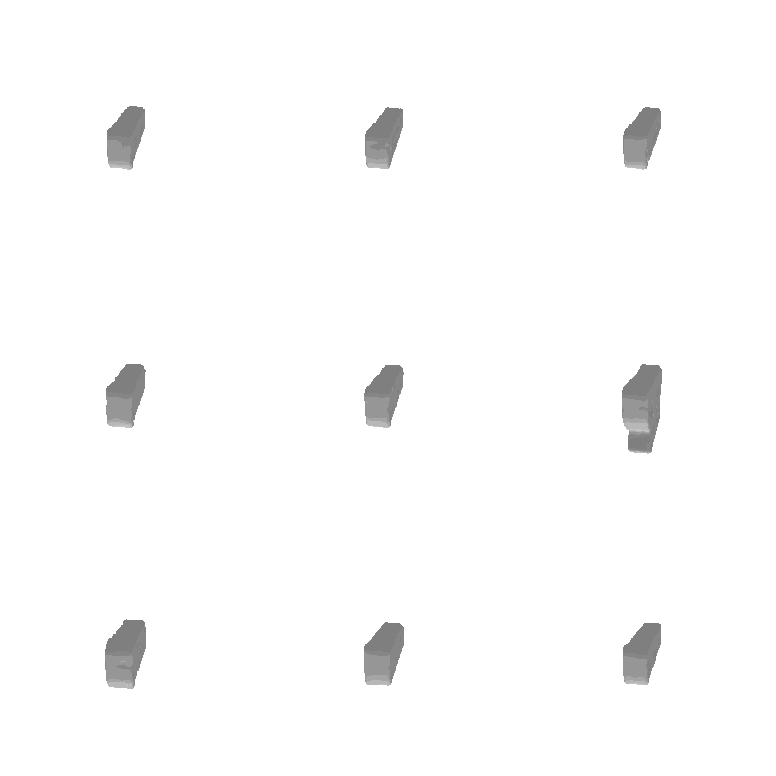

In [ ]:
# txt2shape
out_dir = 'demo_results'
if not os.path.exists(out_dir): os.makedirs(out_dir)

# change the input text here to generate different chairs/tables!
input_txt = "1 dof bending bellow soft actuator 15 folds long"
# pneumatic bending fold based soft actuator

ngen = 9  # number of generated shapes
ddim_steps = 100
ddim_eta = 0.
uc_scale = 3.

sdf_gen = SDFusion.txt2shape(input_txt=input_txt, ngen=ngen, ddim_steps=ddim_steps, ddim_eta=ddim_eta, uc_scale=uc_scale)

mesh_gen = sdf_to_mesh(sdf_gen)

# vis as gif
gen_name = f'{out_dir}/txt2shape-{input_txt}.gif'
save_mesh_as_gif(SDFusion.renderer, mesh_gen, nrow=3, out_name=gen_name)

print(f'Input: "{input_txt}"')
for name in [gen_name]:
    display(ipy_image(name))

In [ ]:
from pytorch3d.io import save_obj
# save mesh as obj
obj_name = f'/root/autodl-tmp/SDFusion/tmp/{input_txt}.obj'

save_obj(obj_name, mesh_gen.verts_list()[0], mesh_gen.faces_list()[0])

FileNotFoundError: [Errno 2] No such file or directory: '/root/autodl-tmp/SDFusion/tmp/bidirectional bending fold based soft actuator.obj'

In [ ]:
from pytorch3d.io import save_obj

for i in range(ngen):
    obj_name = f'/root/autodl-tmp/SDFusion/tmp/{input_txt}_{i}.obj'
    save_obj(obj_name, mesh_gen.verts_list()[i], mesh_gen.faces_list()[i])

In [ ]:
from pytorch3d.io import save_obj
# save mesh as obj
obj_name = f'/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/demo_results/{input_txt}.obj'

save_obj(obj_name, mesh_gen.verts_list()[0], mesh_gen.faces_list()[0])

# Generate more **datasets**

In [ ]:
cd data/Softnet

/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet


In [ ]:
!ls

01  Bending  Extension	generate_bending.py  Gripper  norm_mesh_dir_v1	SDF_v1


# Generate new dataset variations

In [ ]:
# for generating new datasets
from generate_bending import generate_bending_variations

input_dir = f'/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Bending'
generate_bending_variations(input_dir, num_variations=5)

Input directory: /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Bending
Starting generation...
dirs: ['a8', 'a65', 'a69', 'a70', 'a67', 'a64', 'a66', 'a9', 'a7', 'a68', 'a58', 'a56', 'a55', 'a61', 'a6', 'a62', 'a59', 'a63', 'a60', 'a57', 'a37', 'a38', 'a40', 'a5', 'a41', 'a54', 'a4', 'a39', 'a53', 'a36', 'a30', 'a31', 'a3', 'a27', 'a32', 'a35', 'a29', 'a28', 'a33', 'a34', 'a25', 'a21', 'a20', 'a2', 'a24', 'a19', 'a22', 'a23', 'a26', 'a18', 'a16', 'a17', 'a10', 'a13', 'a1', 'a11', 'a15', 'variations']
iterating through new folder
dirs: a8


KeyboardInterrupt: 

In [ ]:
# for generating new datasets
from generate_extension import generate_extension_variations

input_dir = f'/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Extension'
generate_extension_variations(input_dir, num_variations=5)

Input directory: /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Extension
Starting generation...
dirs: ['a49', 'a47', 'a46', 'a52', 'a51', 'a48', 'a44', 'a45', 'a50', 'a43', 'a42', 'a12']
iterating through new folder
dirs: a49
Processed /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Extension/a49/model.obj and generated 5 variations.
iterating through new folder
dirs: a47
Processed /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Extension/a47/model.obj and generated 5 variations.
iterating through new folder
dirs: a46
Processed /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Extension/a46/model.obj and generated 5 variations.
iterating through new folder
dirs: a52
Processed /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Extension/a52/model.obj and generated 5 variations.
iterating through new folder
dirs: a51
Processed /content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softne

In [ ]:
print(os.path.exists('/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/Bending'))


True


## Testing

In [ ]:
# Test for surface smoothness
!python3 analyze_surface.py



Average Standard Deviation of Normal Variation: 0.20191086893813168
Average Maximum Angle Variation: 2.2776279017998946


In [ ]:
!python3 analyze_surface3.py


Average Standard Deviation of Normal Variation: 0.23168255114873523
Average Maximum Angle Variation: 2.634133580089797


In [ ]:
# initialize SDFusion model
# vqvae_path = '/root/autodl-tmp/SDFusion/saved_ckpt/vqvae-snet-all.pth'
ckpt_path = 'saved_ckpt/df_steps-latest.pth'
vqvae_path = 'saved_ckpt/vqvae_epoch-best.pth'
opt.init_model_args(ckpt_path=ckpt_path, vq_ckpt_path=vqvae_path)

SDFusion = create_model(opt)
cprint(f'[*] "{SDFusion.name()}" loaded.', 'cyan')

Working with z of shape (1, 3, 16, 16, 16) = 12288 dimensions.


/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/models/model_utils.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(vq_ckpt, map_location=

[*] VQVAE: weight successfully load from: saved_ckpt/vqvae_epoch-best.pth
vqvae directory!:  VQVAE(
  (encoder): Encoder3D(
    (nonlinearity): GELU(approximate='none')
    (conv_in): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (down): ModuleList(
      (0): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 64, eps=1e-06, affine=True)
            (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
            (norm2): GroupNorm(32, 64, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2))
        )
      )
      (1): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/models/sdfusion_txt2shape_model.py:568: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(ckpt, ma

[*] weight successfully load from: saved_ckpt/df_steps-latest.pth
[*] setting ddim_steps=100
[*] Model has been created: SDFusion-Text2Shape-Model
[*] "SDFusion-Text2Shape-Model" loaded.


In [ ]:
import torch
import pytorch3d
from pytorch3d.ops import sample_points_from_meshes

def mesh_to_sdf(mesh, resolution=64, bounds=None, batch_size=1024):
    device = mesh.device
    # If bounds are not specified, compute them from the mesh
    if bounds is None:
        bounds = torch.stack([mesh.verts_packed().min(0)[0], mesh.verts_packed().max(0)[0]]).T
        padding = (bounds[:, 1] - bounds[:, 0]) * 0.1
        bounds[:, 0] -= padding
        bounds[:, 1] += padding

    # Create a grid of points where the SDF will be evaluated
    x = torch.linspace(bounds[0, 0], bounds[0, 1], resolution, device=device)
    y = torch.linspace(bounds[1, 0], bounds[1, 1], resolution, device=device)
    z = torch.linspace(bounds[2, 0], bounds[2, 1], resolution, device=device)
    grid = torch.stack(torch.meshgrid(x, y, z), dim=-1).reshape(-1, 3)

    # Sample points from the mesh surface
    num_samples = resolution ** 3  # Adjust the number of samples as needed
    surface_points = sample_points_from_meshes(mesh, num_samples).squeeze(0)

    # Initialize SDF tensor
    sdf = torch.full((grid.size(0),), float('inf'), device=device)

    # Process each batch of grid points
    for start in range(0, grid.size(0), batch_size):
        end = min(start + batch_size, grid.size(0))
        distances = torch.cdist(grid[start:end], surface_points)
        min_distances, _ = torch.min(distances, dim=1)
        sdf[start:end] = min_distances

    # Placeholder for inside/outside determination
    sign = torch.ones_like(sdf)  # All outside for simplicity

    # Convert distances to SDF values
    sdf *= sign

    # Reshape to the resolution grid
    sdf = sdf.view(resolution, resolution, resolution)

    return sdf

In [ ]:
import pytorch3d
from tqdm import tqdm

# mesh_dir = '/root/autodl-tmp/SDFusion/test_results_nopre_small_dset/obj/'
# mesh_dir = '/root/autodl-tmp/SDFusion/data/ShapeNet/ShapeNetCore.v1/01'
# mesh_path = os.listdir(mesh_dir)
# mesh_path = [os.path.join(mesh_dir, m_p) for m_p in mesh_path if m_p.endswith('obj')]
# mesh_path = [os.path.join(mesh_dir, m_p, 'model.obj') for m_p in mesh_path if m_p.startswith('b')]
# meshes = pytorch3d.io.load_objs_as_meshes(mesh_path, device=device)

# print("meshes loaded")

# sdfs = []
# for mesh in tqdm(meshes):
#     sdf = mesh_to_sdf(mesh, resolution=64)
#     sdfs.append(sdf)

# sdfs = torch.stack(sdfs).unsqueeze(1).unsqueeze(1)
# print(sdfs.shape)

import h5py
# sdf_dir = "/root/autodl-tmp/SDFusion/data/results_pretrained_small_dset/SDF_v1/resolution_64/01/"
sdf_dir= f'/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_64/a45'
# sdf_dir= f'/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_64/fold based extension 1dof soft actuator 6 folds short Model 3'
sdf_paths = os.listdir(sdf_dir)

sdfs = []
for sub_dir in sdf_paths:
    # if not sub_dir.startswith('b'):
    #     continue
    # sdf_path = os.path.join(sdf_dir, sub_dir, "ori_sample_grid.h5")
    sdf_path = f'/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_64/a45/ori_sample_grid.h5'
    # sdf_path = f'/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_64/fold based extension 1dof soft actuator 6 folds short Model 3/ori_sample_grid.h5'
    h5_f = h5py.File(sdf_path, 'r')
    sdf = h5_f['pc_sdf_sample'][:].astype(np.float32)
    sdf = torch.Tensor(sdf).view(1, 64, 64, 64).to(device)
    sdf = sdf.unsqueeze(0).unsqueeze(0)
    sdfs.append(sdf)

sdfs = torch.cat(sdfs, dim=0)
print(sdfs.shape)

print("sdfs loaded")

codes = []
SDFusion.eval()
SDFusion.vqvae.eval()
with torch.no_grad():
    # SDFusion.vqvae.encode(sdf)
    for sdf in tqdm(sdfs):
        code = SDFusion.vqvae.encode_no_quant(sdf)
        codes.append(code)

# calculate mean and std for FID, but here we save first for later FID calculation
codes = torch.cat(codes, dim=0)
# torch.save(codes, '/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/fold based extension 1dof soft actuator 6 folds short Model 3.pth')
torch.save(codes, '/content/drive/My Drive/Colab Notebooks/Soft-Fusion-FYP/a45.pth')

torch.Size([2, 1, 1, 64, 64, 64])
sdfs loaded


100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


In [ ]:
!ldd "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/preprocess/isosurface/computeDistanceField" "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/01/a26/pc_norm.obj" 256 256 256 -s -e 1.3 -o 1.dist -m 1 -c

In [ ]:
!mv "1.dist" "/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/data/Softnet/SDF_v1/resolution_128/a25/isosurf.sdf"

In [ ]:
# Test for 3D fretchet-distance
!python3 TFD.py

True
/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/TFD.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  codes1 = torch.load(codes1)
/content/drive/MyDrive/Colab

In [ ]:
!python3 TFD3.py

True
/content/drive/MyDrive/Colab Notebooks/Soft-Fusion-FYP/TFD3.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  codes1 = torch.load(codes1)
/content/drive/MyDrive/Cola